In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

In [39]:
df=pd.read_csv(r'C:\Users\ella.gorgin\Dropbox\Data_Analytics\Data_sets\Us_police_shootings\US_Police_shootings.csv',parse_dates=['date'])
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [40]:
df.shape

(7729, 17)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       7729 non-null   int64         
 1   name                     7312 non-null   object        
 2   date                     7729 non-null   datetime64[ns]
 3   manner_of_death          7729 non-null   object        
 4   armed                    7520 non-null   object        
 5   age                      7247 non-null   float64       
 6   gender                   7709 non-null   object        
 7   race                     6269 non-null   object        
 8   city                     7729 non-null   object        
 9   state                    7729 non-null   object        
 10  signs_of_mental_illness  7729 non-null   bool          
 11  threat_level             7729 non-null   object        
 12  flee                     6854 non-

In [42]:
df.isnull().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

In [43]:
df.dropna(subset=['name','longitude','latitude'], inplace=True)

In [44]:
df['armed'] = df['armed'].fillna(df['armed'].mode()[0]) 
df['age'] = df['age'].fillna(df['age'].mode()[0])
df['race'] = df['race'].fillna(df['race'].mode()[0]) 
df['flee'] = df['flee'].fillna(df['flee'].mode()[0]) 
df['gender'] = df['gender'].fillna(df['gender'].mode()[0]) 

In [45]:
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
dtype: int64

In [46]:
df['day'] = df['date'].map(lambda x: x.day)
df['month'] = df['date'].map(lambda x: x.month)
df['year'] = df['date'].map(lambda x: x.year)

In [47]:
len(df.groupby('name')['name'].aggregate('count'))

6551

In [48]:
df.groupby('race')['race'].aggregate('count')

race
A     104
B    1538
H    1057
N      88
O      47
W    3740
Name: race, dtype: int64

In [49]:
len(df.groupby('state')['state'].aggregate('count'))

51

In [50]:
df.groupby('signs_of_mental_illness')['signs_of_mental_illness'].aggregate('count')

signs_of_mental_illness
False    5101
True     1473
Name: signs_of_mental_illness, dtype: int64

In [51]:
df.groupby('threat_level')['threat_level'].aggregate('count')

threat_level
attack          4185
other           2172
undetermined     217
Name: threat_level, dtype: int64

In [52]:
df.groupby('flee')['flee'].aggregate('count')

flee
Car            1038
Foot            831
Not fleeing    4469
Other           236
Name: flee, dtype: int64

In [53]:
df.groupby('body_camera')['body_camera'].aggregate('count')

body_camera
False    5624
True      950
Name: body_camera, dtype: int64

In [54]:
df.groupby('is_geocoding_exact')['is_geocoding_exact'].aggregate('count')

is_geocoding_exact
False      17
True     6557
Name: is_geocoding_exact, dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
df['manner_of_death']= le.fit_transform(df['manner_of_death'])
df['armed']= le.fit_transform(df['armed'])
df['race']= le.fit_transform(df['race'])
df['city']= le.fit_transform(df['city'])
df['state']= le.fit_transform(df['state'])
df['signs_of_mental_illness']= le.fit_transform(df['signs_of_mental_illness'])
df['threat_level']= le.fit_transform(df['threat_level'])
df['flee']= le.fit_transform(df['flee'])
df['body_camera']= le.fit_transform(df['body_camera'])
df['is_geocoding_exact']= le.fit_transform(df['is_geocoding_exact'])

In [57]:
df.groupby('gender')['gender'].aggregate('count')

gender
F     312
M    6262
Name: gender, dtype: int64

In [58]:
df['gender'] = df['gender'].replace({'M':1,'F':0})
df.groupby('gender')['gender'].aggregate('count')

gender
0     312
1    6262
Name: gender, dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'manner_of_death'}>,
        <AxesSubplot:title={'center':'armed'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'race'}>,
        <AxesSubplot:title={'center':'city'}>],
       [<AxesSubplot:title={'center':'state'}>,
        <AxesSubplot:title={'center':'signs_of_mental_illness'}>,
        <AxesSubplot:title={'center':'threat_level'}>,
        <AxesSubplot:title={'center':'flee'}>],
       [<AxesSubplot:title={'center':'body_camera'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'is_geocoding_exact'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=obje

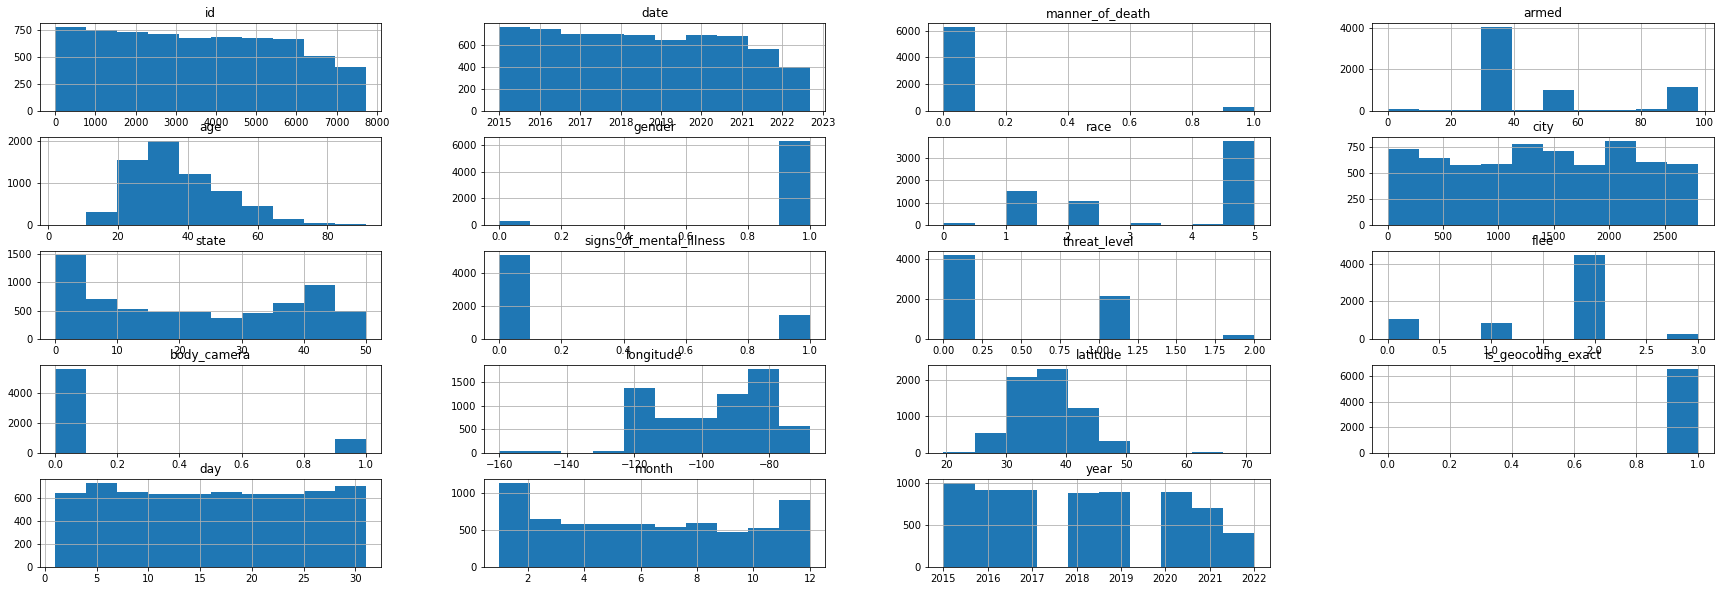

In [59]:
df.hist(figsize=(30,10))

In [60]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,day,month,year
0,1,Tim Elliot,2015-01-02,0,37,53.0,1,0,2306,47,1,0,2,0,-123.122,47.247,1,2,1,2015
1,2,Lewis Lee Lembke,2015-01-02,0,37,47.0,1,5,40,37,0,0,2,0,-122.892,45.487,1,2,1,2015
2,3,John Paul Quintero,2015-01-03,1,90,23.0,1,2,2739,16,0,1,2,0,-97.281,37.695,1,3,1,2015
3,4,Matthew Hoffman,2015-01-04,0,89,32.0,1,5,2226,4,1,0,2,0,-122.422,37.763,1,4,1,2015
4,5,Michael Rodriguez,2015-01-04,0,66,39.0,1,2,801,5,0,0,2,0,-104.692,40.384,1,4,1,2015


In [61]:
X=df.drop(['name','date','is_geocoding_exact'], axis='columns')
X.head()

,id,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,day,month,year
0,1,0,37,53.0,1,0,2306,47,1,0,2,0,-123.122,47.247,2,1,2015
1,2,0,37,47.0,1,5,40,37,0,0,2,0,-122.892,45.487,2,1,2015
2,3,1,90,23.0,1,2,2739,16,0,1,2,0,-97.281,37.695,3,1,2015
3,4,0,89,32.0,1,5,2226,4,1,0,2,0,-122.422,37.763,4,1,2015
4,5,0,66,39.0,1,2,801,5,0,0,2,0,-104.692,40.384,4,1,2015


In [62]:
y=df['is_geocoding_exact']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
model=RandomForestClassifier()

In [67]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
model.predict()